In [1]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


In [2]:
objects = {}
prob_cutoff = 0.15
#maybe use probability score instead of binary next time?

for i in range(1,9):   
    file_name = 'images_run'+str(i)+'.json'
    with open(file_name) as json_file:
        data_ = json.load(json_file)
    
    for img in data_.keys():
        if i < 7:
            key_ = img[:len(img)-4]
        else:
            key_ = img
        ds = np.array(data_[img]['detection_scores'])
        ob = np.array(data_[img]['detection_class_entities'])
        mask_ = (ds >= prob_cutoff)
        objects[key_] = ob[mask_]
    

In [3]:
set_ = np.array([])
for k in objects.keys():
    set_ = np.append(set_, objects[k])
unique_objects = set(set_)

In [5]:
object_df = pd.DataFrame(columns =list(unique_objects))

for k in objects.keys():
    
    counter = np.zeros(len(unique_objects))
    for obj in objects[k]:
        index_ = object_df.columns.get_loc(obj)
        counter[index_] = counter[index_] + 1
        
    object_df.loc[k] = counter        

In [103]:
#freq = object_df.apply(sum, axis = 0).sort_values(ascending = False)
#useful_objects = freq[freq >= 20].index

In [8]:
#PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(object_df)
object_df_pca = pca.transform(object_df)



PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

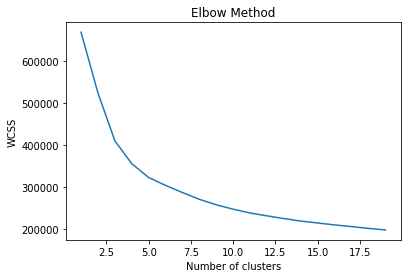

In [18]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(object_df_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
#7 to 10 seems like a good K
for i in [7,8,9,10]:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(object_df_pca)
    file_name = 'pca_KNN_'+str(i)+'.csv'
    pd.DataFrame({"Segment":object_df.index, "Cluster": kmeans.labels_}).to_csv(file_name, index = False)

In [132]:
pd.DataFrame({"Segment":object_df.index, "Cluster": kmeans.labels_})

,Segment,Cluster
0,20006000,8
1,20010000,8
2,20011000,8
3,20013000,8
4,20034000,0
5,20039000,6
6,20041000,8
7,20044000,2
8,20046000,6
9,20056000,2


In [ ]:
##sparse data PCA?
##different cut off?
##choose K with target?
##choose K with sum of squared distance
##use probability score instead?
